# Matplotlib for Publication - Exercise 1

Here you will play with a cleaned and curated version of a recent release of the NASA exoplanet database, featuring >5000 exoplanets, that was published on the Kaggle. Some of the units have been changed from the original document so that you can focus on plotting (e.g. most gas giant planets had their masses and radii reported in Jupiter units, but I've converted all planet masses and radii to Earth units). 

Here are the column names and descriptions:
- **name**: exoplanet name. The convention is the star's catalog name followed by a lowercase letter, starting with b and progressing alphabetically in order of discovery 
- **distance**: distance to the planetary system in light years
- **star_mag**: apparent brightness of the star as seen from Earth in the astronomical magnitude system (don't worry about this one too much, the units are pretty awful to work with). Higher numbers indicate fainter stars and the system is logarithmic; an *increase* of 5 magnitudes corresponds to a *decrease* in brightness by a factor of 100.
- **planet_type**: values include "Gas Giant" (like Jupiter or Saturn), "Neptune-like" (sort of a mini gas giant or ice giant), "Super Earth" (thought to be rocky but up to a few times larger than Earth), and "Terrestrial" (comparable to or smaller than Earth)
- **discovery_yr**: year that the discovery of the planet was published
- **mass_ME**: mass of the planet in units of Earth masses (1 Earth mass = $5.972 \times 10^{24}$ kg)
- **radius_RE**: radius of the planet in units of Earth masses (1 Earth radius = 6371 km)
- **orbital_radius_AU**: the exoplanet's orbital semi-major axis in units of the average distance between the Earth and Sun (1 Astronomical Unit, or AU)
- **orbital_period_yr**: the time taken for the exoplanet to orbit its star in units of Earth's year
- **eccentricity**: measure of the deviation of the exoplanet's orbit from a perfect circle. Values range from 0 to 1 where 0 = perfect circle and 1 indicates a parabolic (just barely unbound) orbit.
- **detection_method**: principle method used to detect the planet. See [this educational slideshow by NASA](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/) or [this Wikipedia page](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets) for more details.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

exos = np.genfromtxt('exoplanets_5250_EarthUnits.csv',delimiter=',',dtype=None,
                     names=True, encoding='ascii')

#take a quick peak at the data so we know how to call it
print(exos.dtype.names)
print(exos[np.where(exos['name']=='55 Cancri e')])
print(exos[705])

('name', 'distance', 'star_mag', 'planet_type', 'discovery_yr', 'mass_ME', 'radius_RE', 'orbital_radius_AU', 'orbital_period_yr', 'eccentricity', 'detection_method')
[('55 Cancri e', 41, 5.95084, 'Super Earth', 2004, 7.99, 1.875, 0.01544, 0.0019165, 0.05, 'Radial Velocity')]
('HD 160691 e', 51, 5.12, 'Gas Giant', 2006, 2226., nan, 0.934, 0.84298426, 0.07, 'Radial Velocity')


1. First, see what you get if you plot the exoplanet mass against the orbital radius. (Tip: you may want to use a log-log scale). Label the axes $a\;[\mathrm{AU}]$ for orbital semi-major axis and $M\;[\mathrm{M}_{\oplus}]$ or $M\;[\mathrm{M}_{\mathrm{E}}]$ for mass with the correct LaTeX formatting\*. You can find the LaTeX code for the crossed circle $\oplus$ at https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols under the binary operators. 

\*Note: Some astronomers use the crossed circle $\oplus$, the astronomical/astrological symbol for Earth, while others just use a subscript capital E. I prefer the former because as a symbol, it's used for fewer other purposes (the only other use is as the elementwise matrix addition operator), but the E may be more intuitive and is often used by astronomers who publish to broader-based journals like *Nature* or *Science*.

Text(0, 0.5, '$M\\;[\\mathrm{M}_{\\oplus}]$')

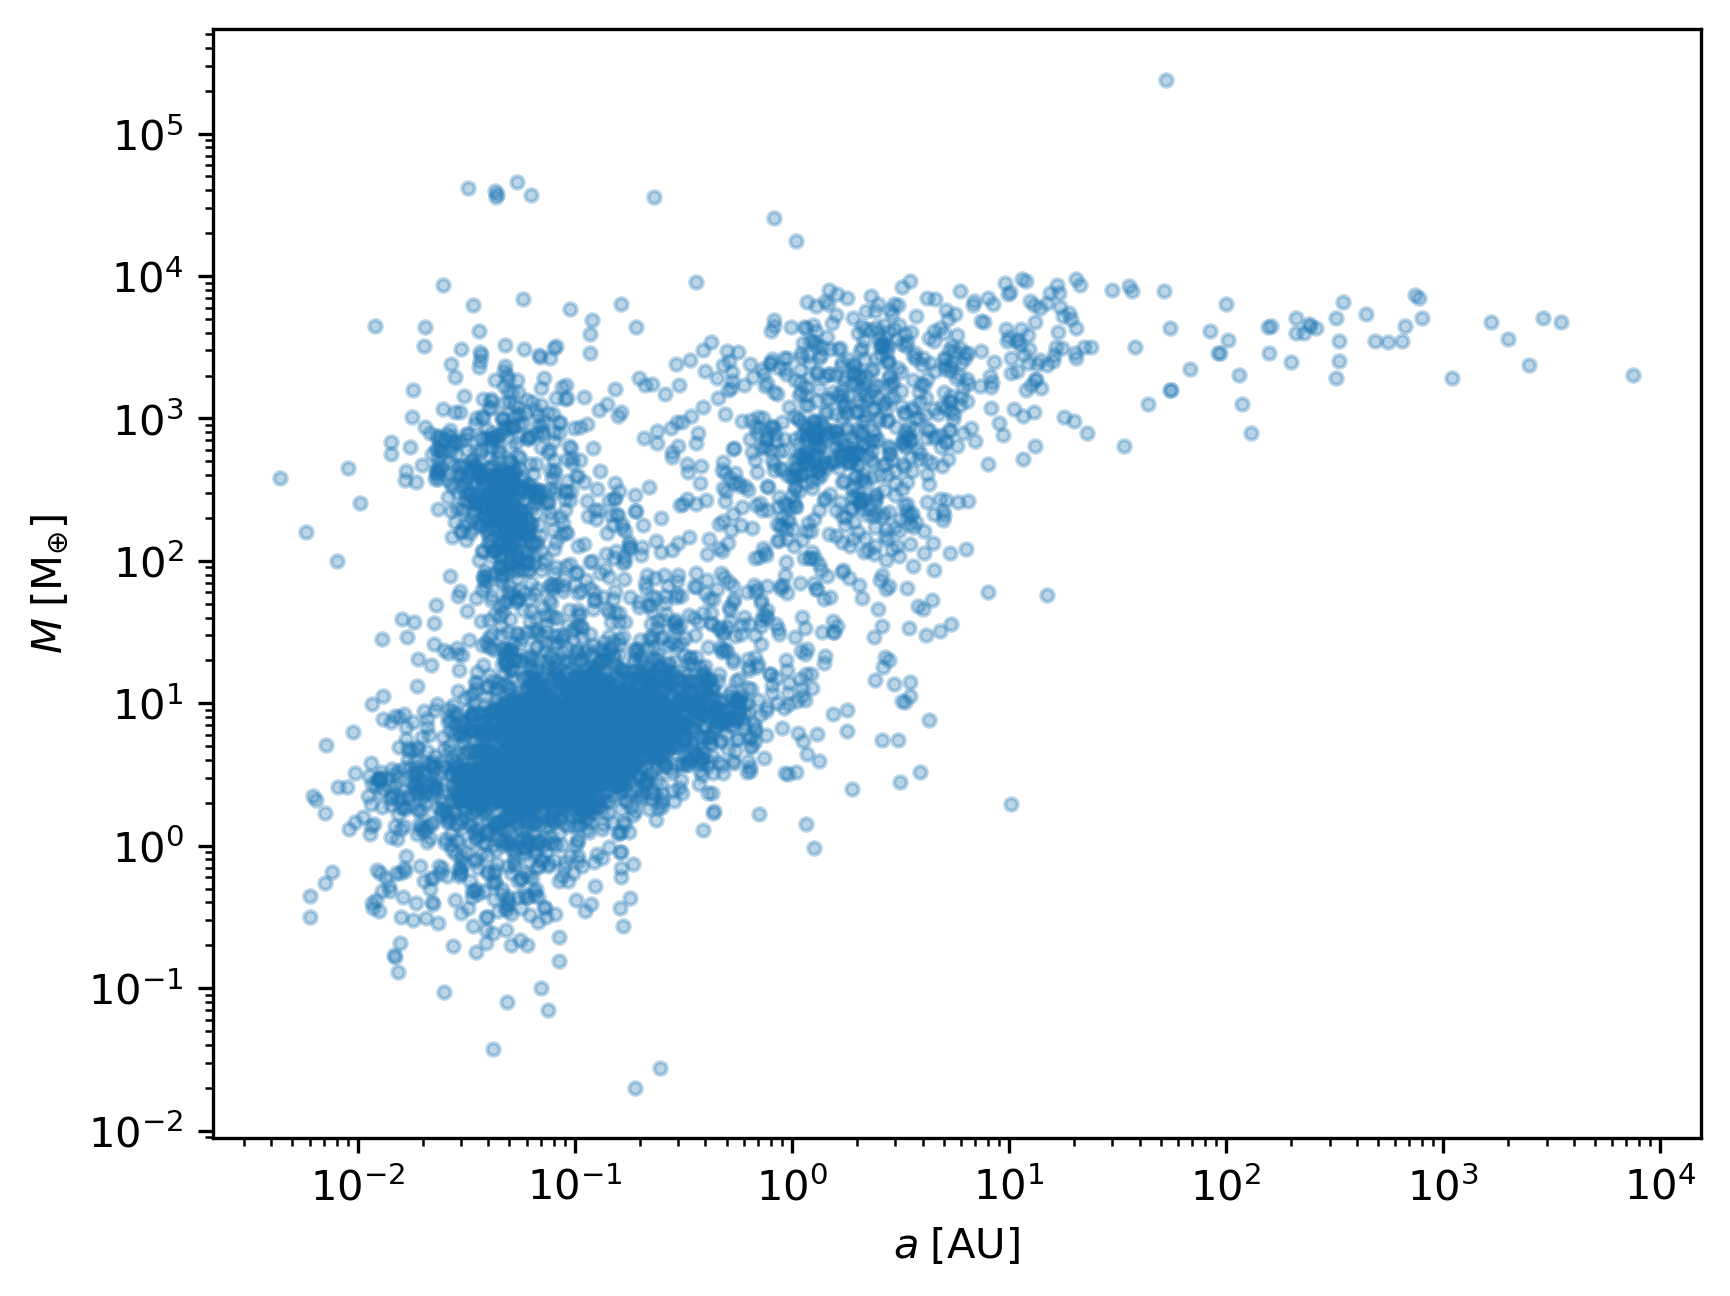

In [3]:
fig,ax = plt.subplots(dpi=300)
ax.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], '.', alpha=0.3)
ax.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')

If you just did a log-log plot, you can probably make out 3 concentrations, but the points probably look a bit dense. Try setting the alpha kwarg of plt.loglog() to a value between 0 and 1.

2. Try recreating the plot from part 1 as a hexbin plot (hint: log scales for both axes and binning are available in the kwargs). Compare the default binning to log-scaled binning, and the latter to the translucent log-log scatter plot above. Which is best if you want to emphasize that...
    - ...there are apparently 3 main population groups?
    - ...the most common type of planet seems to be Super Earths (a few to ~10 times the mass of Earth)?
    - ...there is a mass - orbital-radius sensitivity limit that is only broken at large orbital radii by very large planets that we can directly image? (In other words, you want the outliers to be prominent.)
    
    There are no "wrong" answers, but there are usually better and worse answers.

Text(0, 0.5, '$M\\;[\\mathrm{M}_{\\oplus}]$')

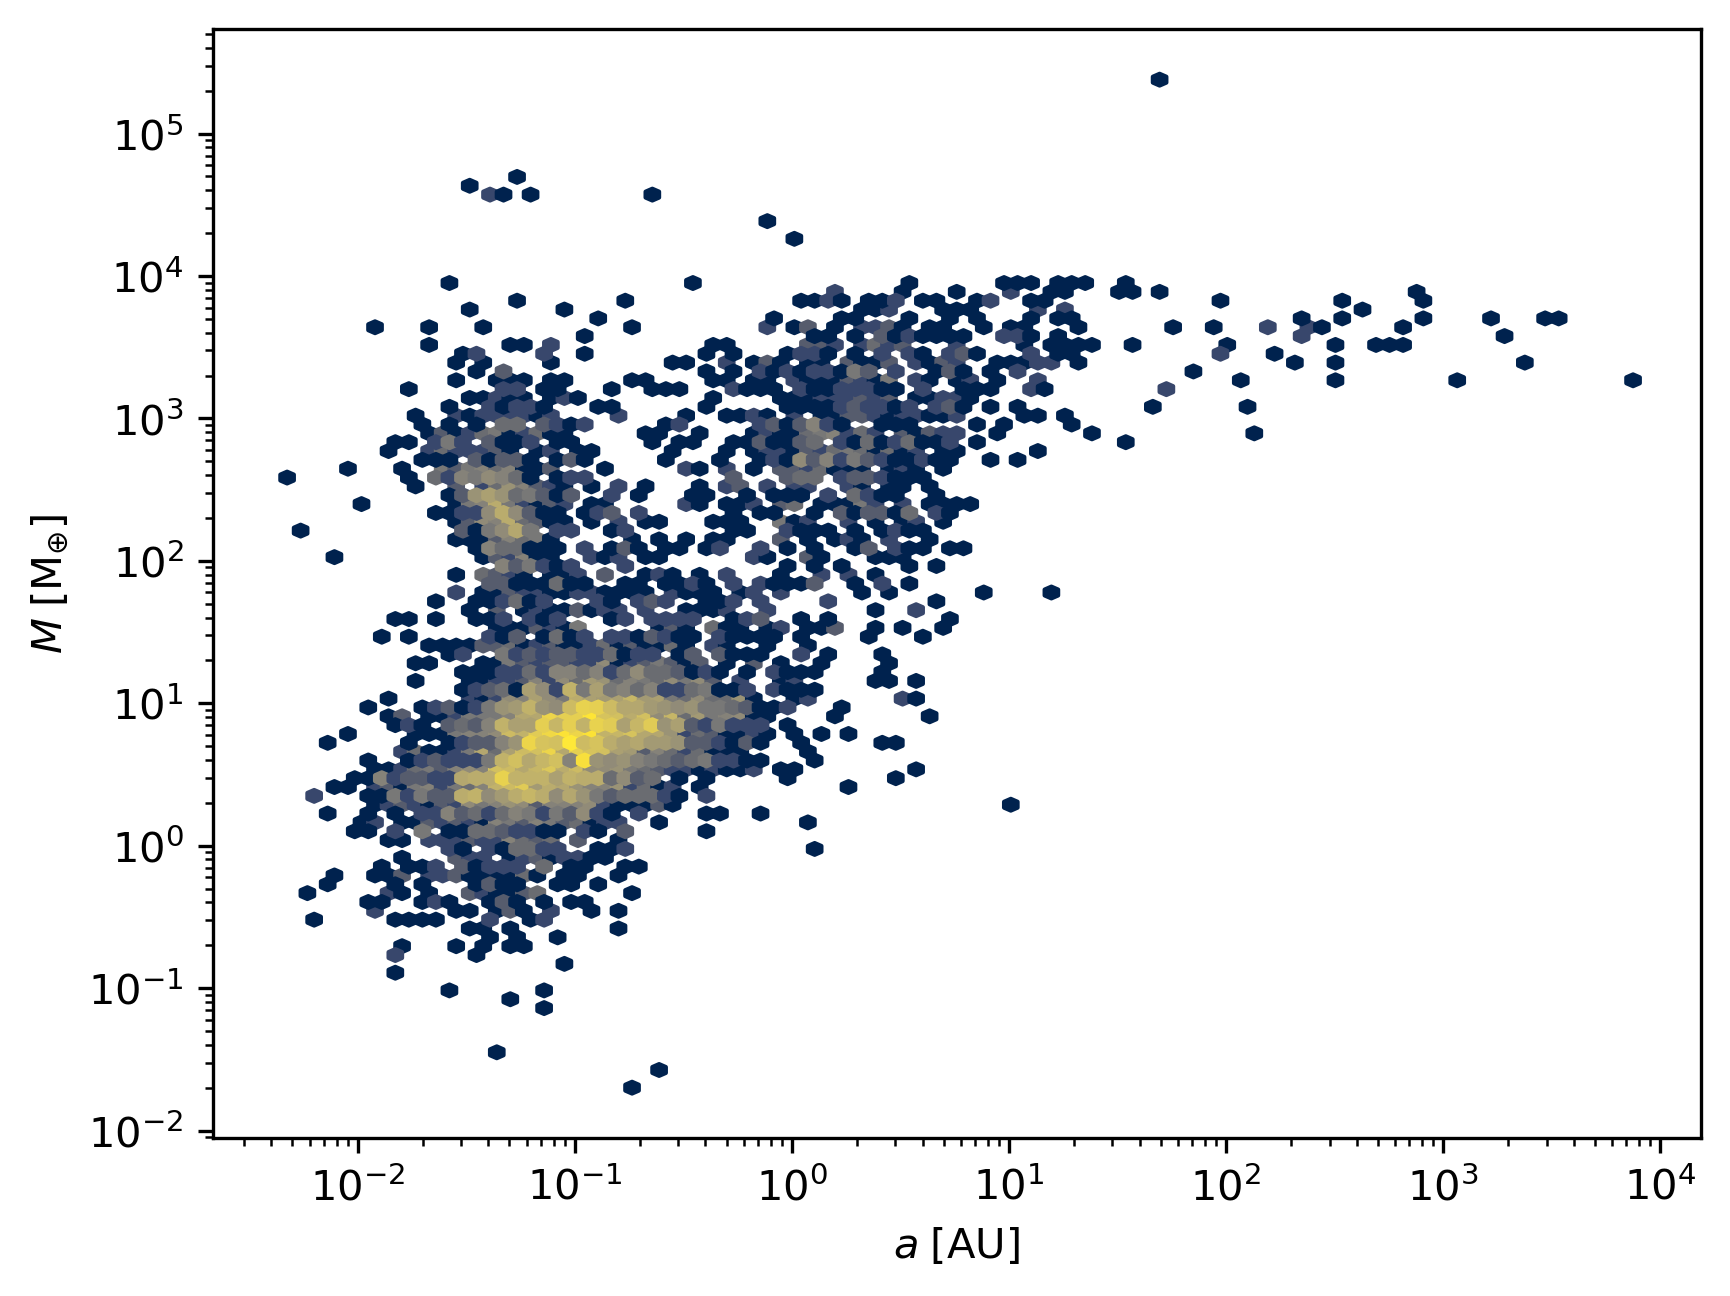

In [7]:
import matplotlib as mpl
fig,ax = plt.subplots(dpi=300)
ax.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
           cmap = mpl.colormaps['cividis'])
ax.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')

3. Let's say you want to see where the Solar System and some other famous multi-planet systems lie on this plot. Use where statements or other filters to pick out planets in the systems 55 Cancri, TRAPPIST-1, Kepler-90, and HD 40307, and use the given dictionary variable to plot the major Solar System planets (and Pluto for perspective) on the same figure. Every data set should have a distinct marker and color. Now re-evaluate whether the hexbin or scatter plot is better (you might consider plotting them side-by-side or one atop the other in subplots).

    *Expert mode:* try plotting the attached PNG image on Earth at earth's location on the plot using OffsetImage and AnnotationBox from `matplotlib.offsetbox`, and `plt.imread()`. Make sure it's recognizable, but doesn't totally cover Venus or too much of the exoplanet data.

In [8]:
solsys = {'name': np.array(['Mercury','Venus','Earth','Mars',
                            'Jupiter','Saturn','Uranus','Neptune','Pluto']),
         'planet_type': np.array(['Terrestrial','Terrestrial','Terrestrial','Terrestrial',
                                  'Gas Giant','Gas Giant','Neptune-like','Neptune-like', 'Ice Dwarf']), 
         'mass_ME': np.array([0.0553,0.815,1.0,0.107, 317.8,95.2,14.5,17.1, 0.0022]), 
         'radius_RE': np.array([0.383,0.949,1.0,0.532, 11.21,9.45,4.01,3.88, 0.187]),
         'orbital_radius_AU': np.array([0.387,0.723,1.0,1.52, 5.20,9.57,19.17,30.18, 39.48]),
         'orbital_period_yr': np.array([0.241,0.615,1.0,1.88, 11.9,29.4,83.7,163.7, 247.9]),
         'eccentricity': np.array([0.206,0.007,0.017,0.094, 0.049,0.052,0.047,0.010, 0.244])}

In [9]:
# for k,s in enumerate(['55 Cancri','TRAPPIST-1','Kepler-90','Kepler-11','HD 40307']):
#     print(np.where(list(map(lambda s: s[:-2], exos['name'])) == s))
print(np.where( np.array(list(map(lambda s: s[:-2], exos['name']))) == 'Kepler-90'))

(array([4358]),)


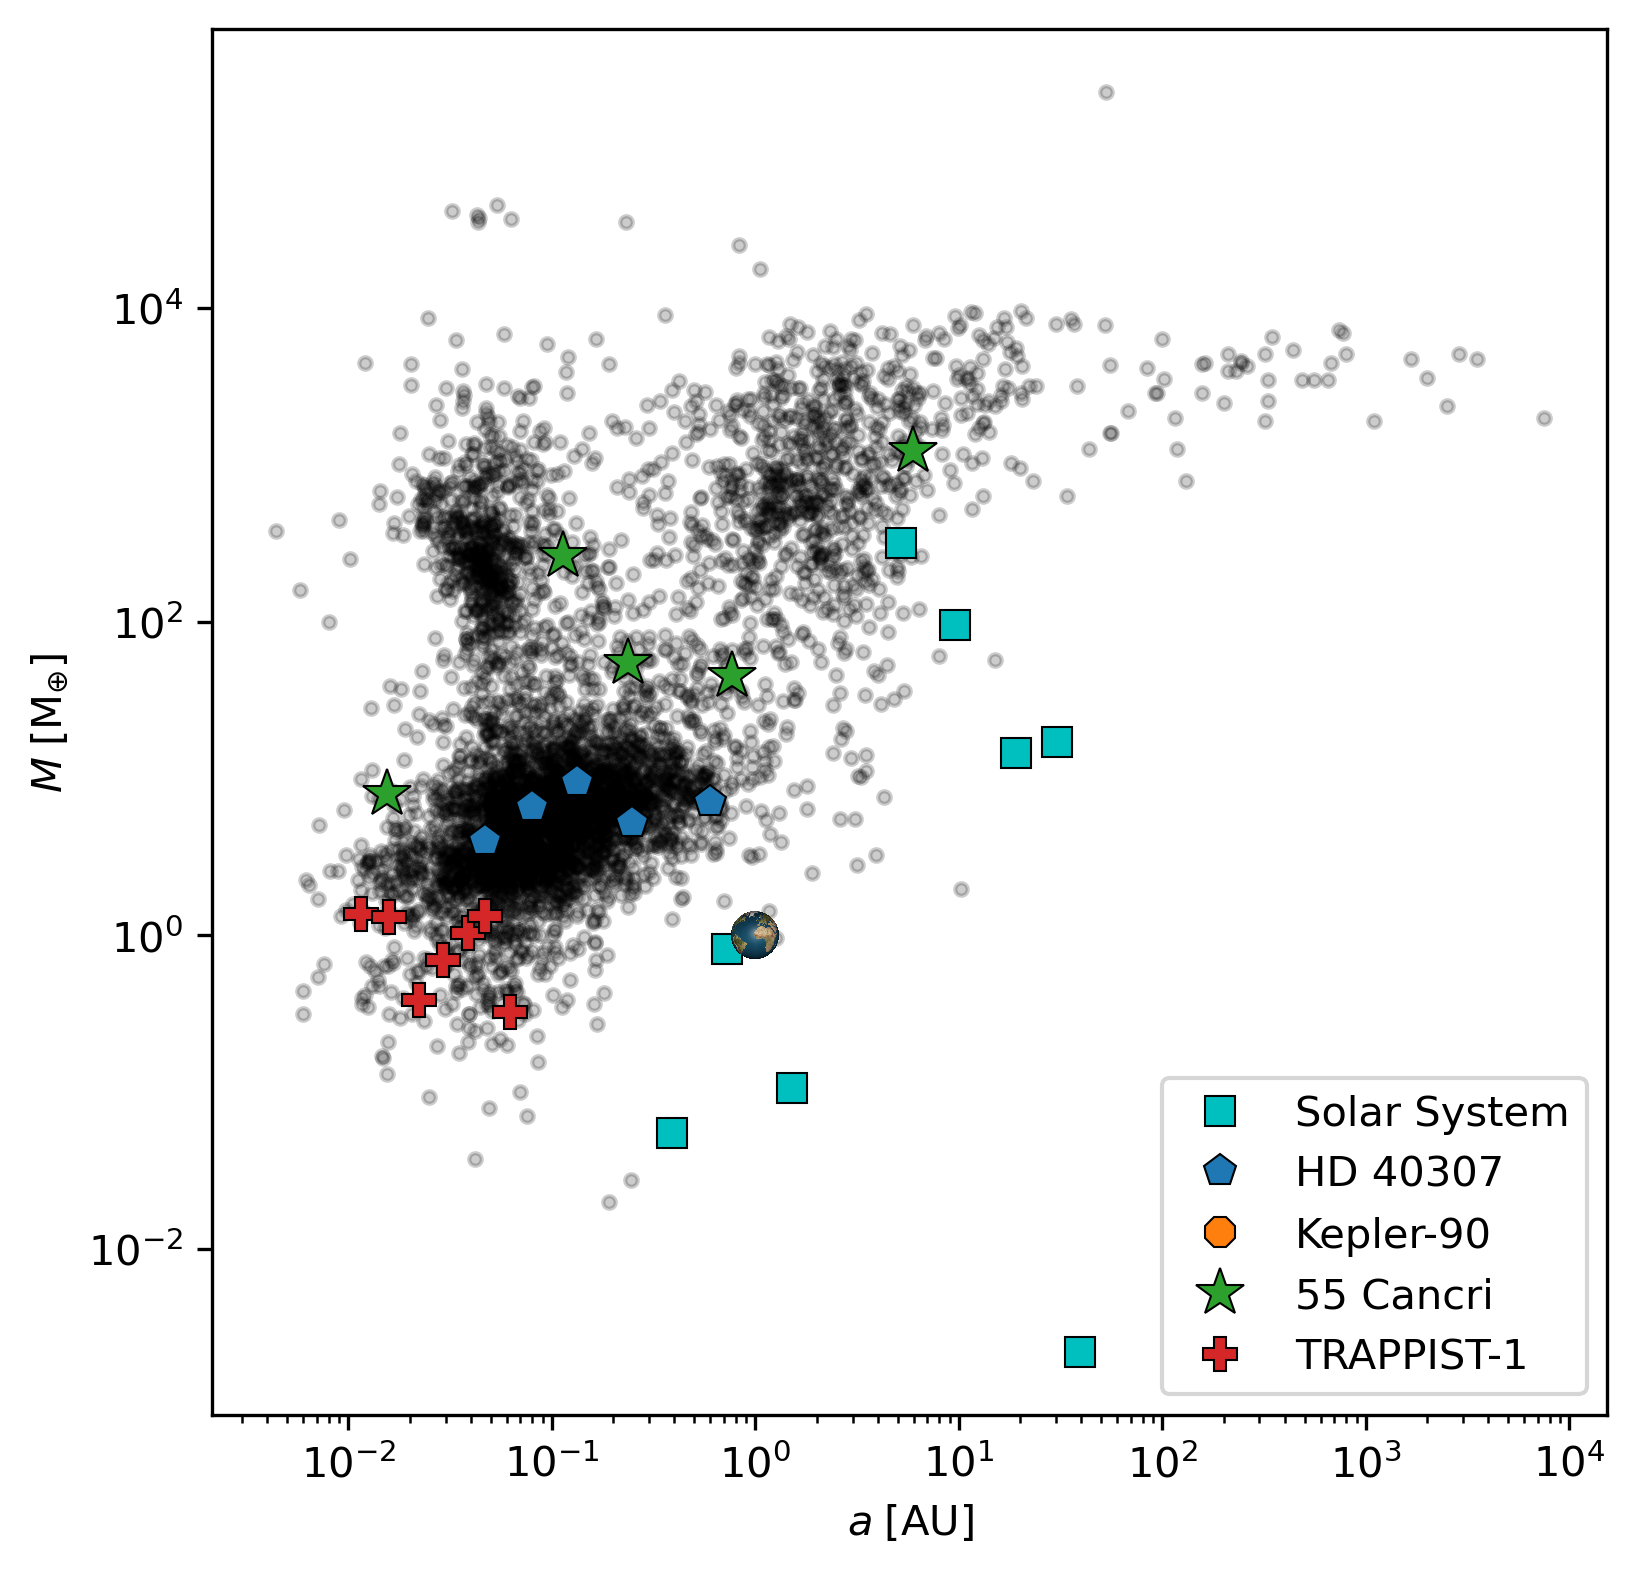

In [10]:
fig,ax = plt.subplots(dpi=300, figsize=(6,6))
ax.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], '.', alpha=0.2, color='k')
ax.loglog(solsys['orbital_radius_AU'],solsys['mass_ME'],'cs',label='Solar System',
          mec='k',mew=0.5,ms=7)
mks = ['p','8','*','P']
for k,s in enumerate(['HD 40307','Kepler-90','55 Cancri','TRAPPIST-1']):
    inds = np.where(np.array(list(map(lambda s: s[:-2], exos['name']))) == s)
    ax.loglog(exos['orbital_radius_AU'][inds],exos['mass_ME'][inds],marker=mks[k],label=s,
              ls='none',mec='k',mew=0.5,ms=12 if mks[k]=='*' else 8)
ax.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
ax.legend()

icon = plt.imread('Earth.png')
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent.
imagebox = OffsetImage(icon, zoom = 0.01)
#Annotation box for solar pv logo
#Container for the imagebox referring to a specific position *xy*.
ab = AnnotationBbox(imagebox, (1., 1.), frameon = False)
ax.add_artist(ab)
plt.show()

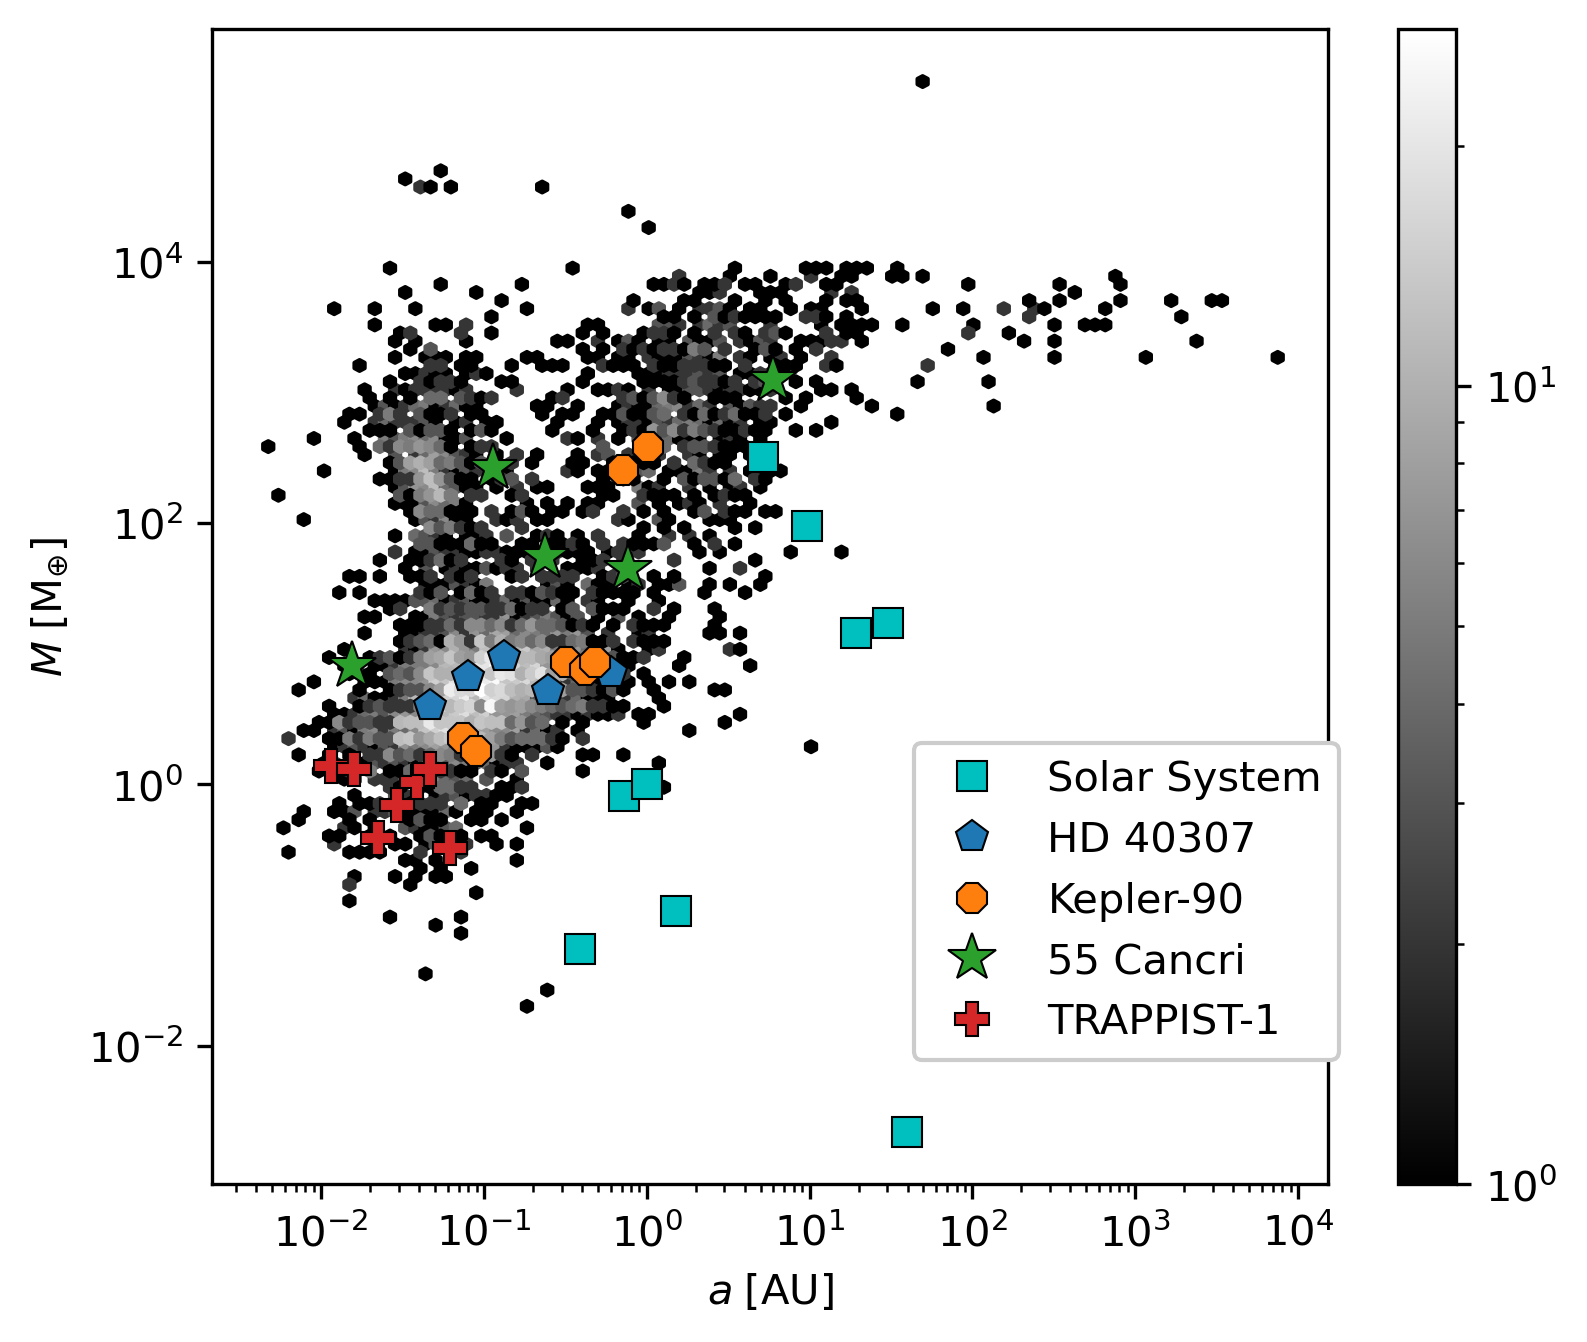

In [66]:
import matplotlib as mpl
fig,ax = plt.subplots(dpi=300, figsize=(6,5))
hbin=ax.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
           cmap = mpl.colormaps['gray'])
ax.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
ax.loglog(solsys['orbital_radius_AU'],solsys['mass_ME'],'cs',label='Solar System',
          mec='k',mew=0.5,ms=7)
mks = ['p','8','*','P']
for k,s in enumerate(['HD 40307','Kepler-90','55 Cancri','TRAPPIST-1']):
    inds = np.where(np.array(list(map(lambda s: s[:-2], exos['name']))) == s)
    ax.loglog(exos['orbital_radius_AU'][inds],exos['mass_ME'][inds],marker=mks[k],label=s,
              ls='none',mec='k',mew=0.5,ms=12 if mks[k]=='*' else 8)
ax.legend(bbox_to_anchor=(0.61,0.4),framealpha=1)
fig.colorbar(hbin)

4. You might have noticed in the previous couple of plots that at least one of the axes switched to showing every other power of 10 and did away with the minor tickmarks. That's not ideal. Use tick locators to make sure every power of ten is shown.
    
    *Hard mode:* show minor ticks at least every 2/10 of a decade. Refer to https://stackoverflow.com/questions/44078409/how-to-display-all-minor-tick-marks-on-a-semi-log-plot if you need help.

In [48]:
print(np.log10(np.min(solsys['mass_ME'])),np.log10(np.nanmax(exos['mass_ME'])))
print(np.log10(np.nanmin(exos['orbital_radius_AU'])),np.log10(np.nanmax(exos['orbital_radius_AU'])))

-2.657577319177794 5.378644960576075
-2.3565473235138126 3.8754085600770636


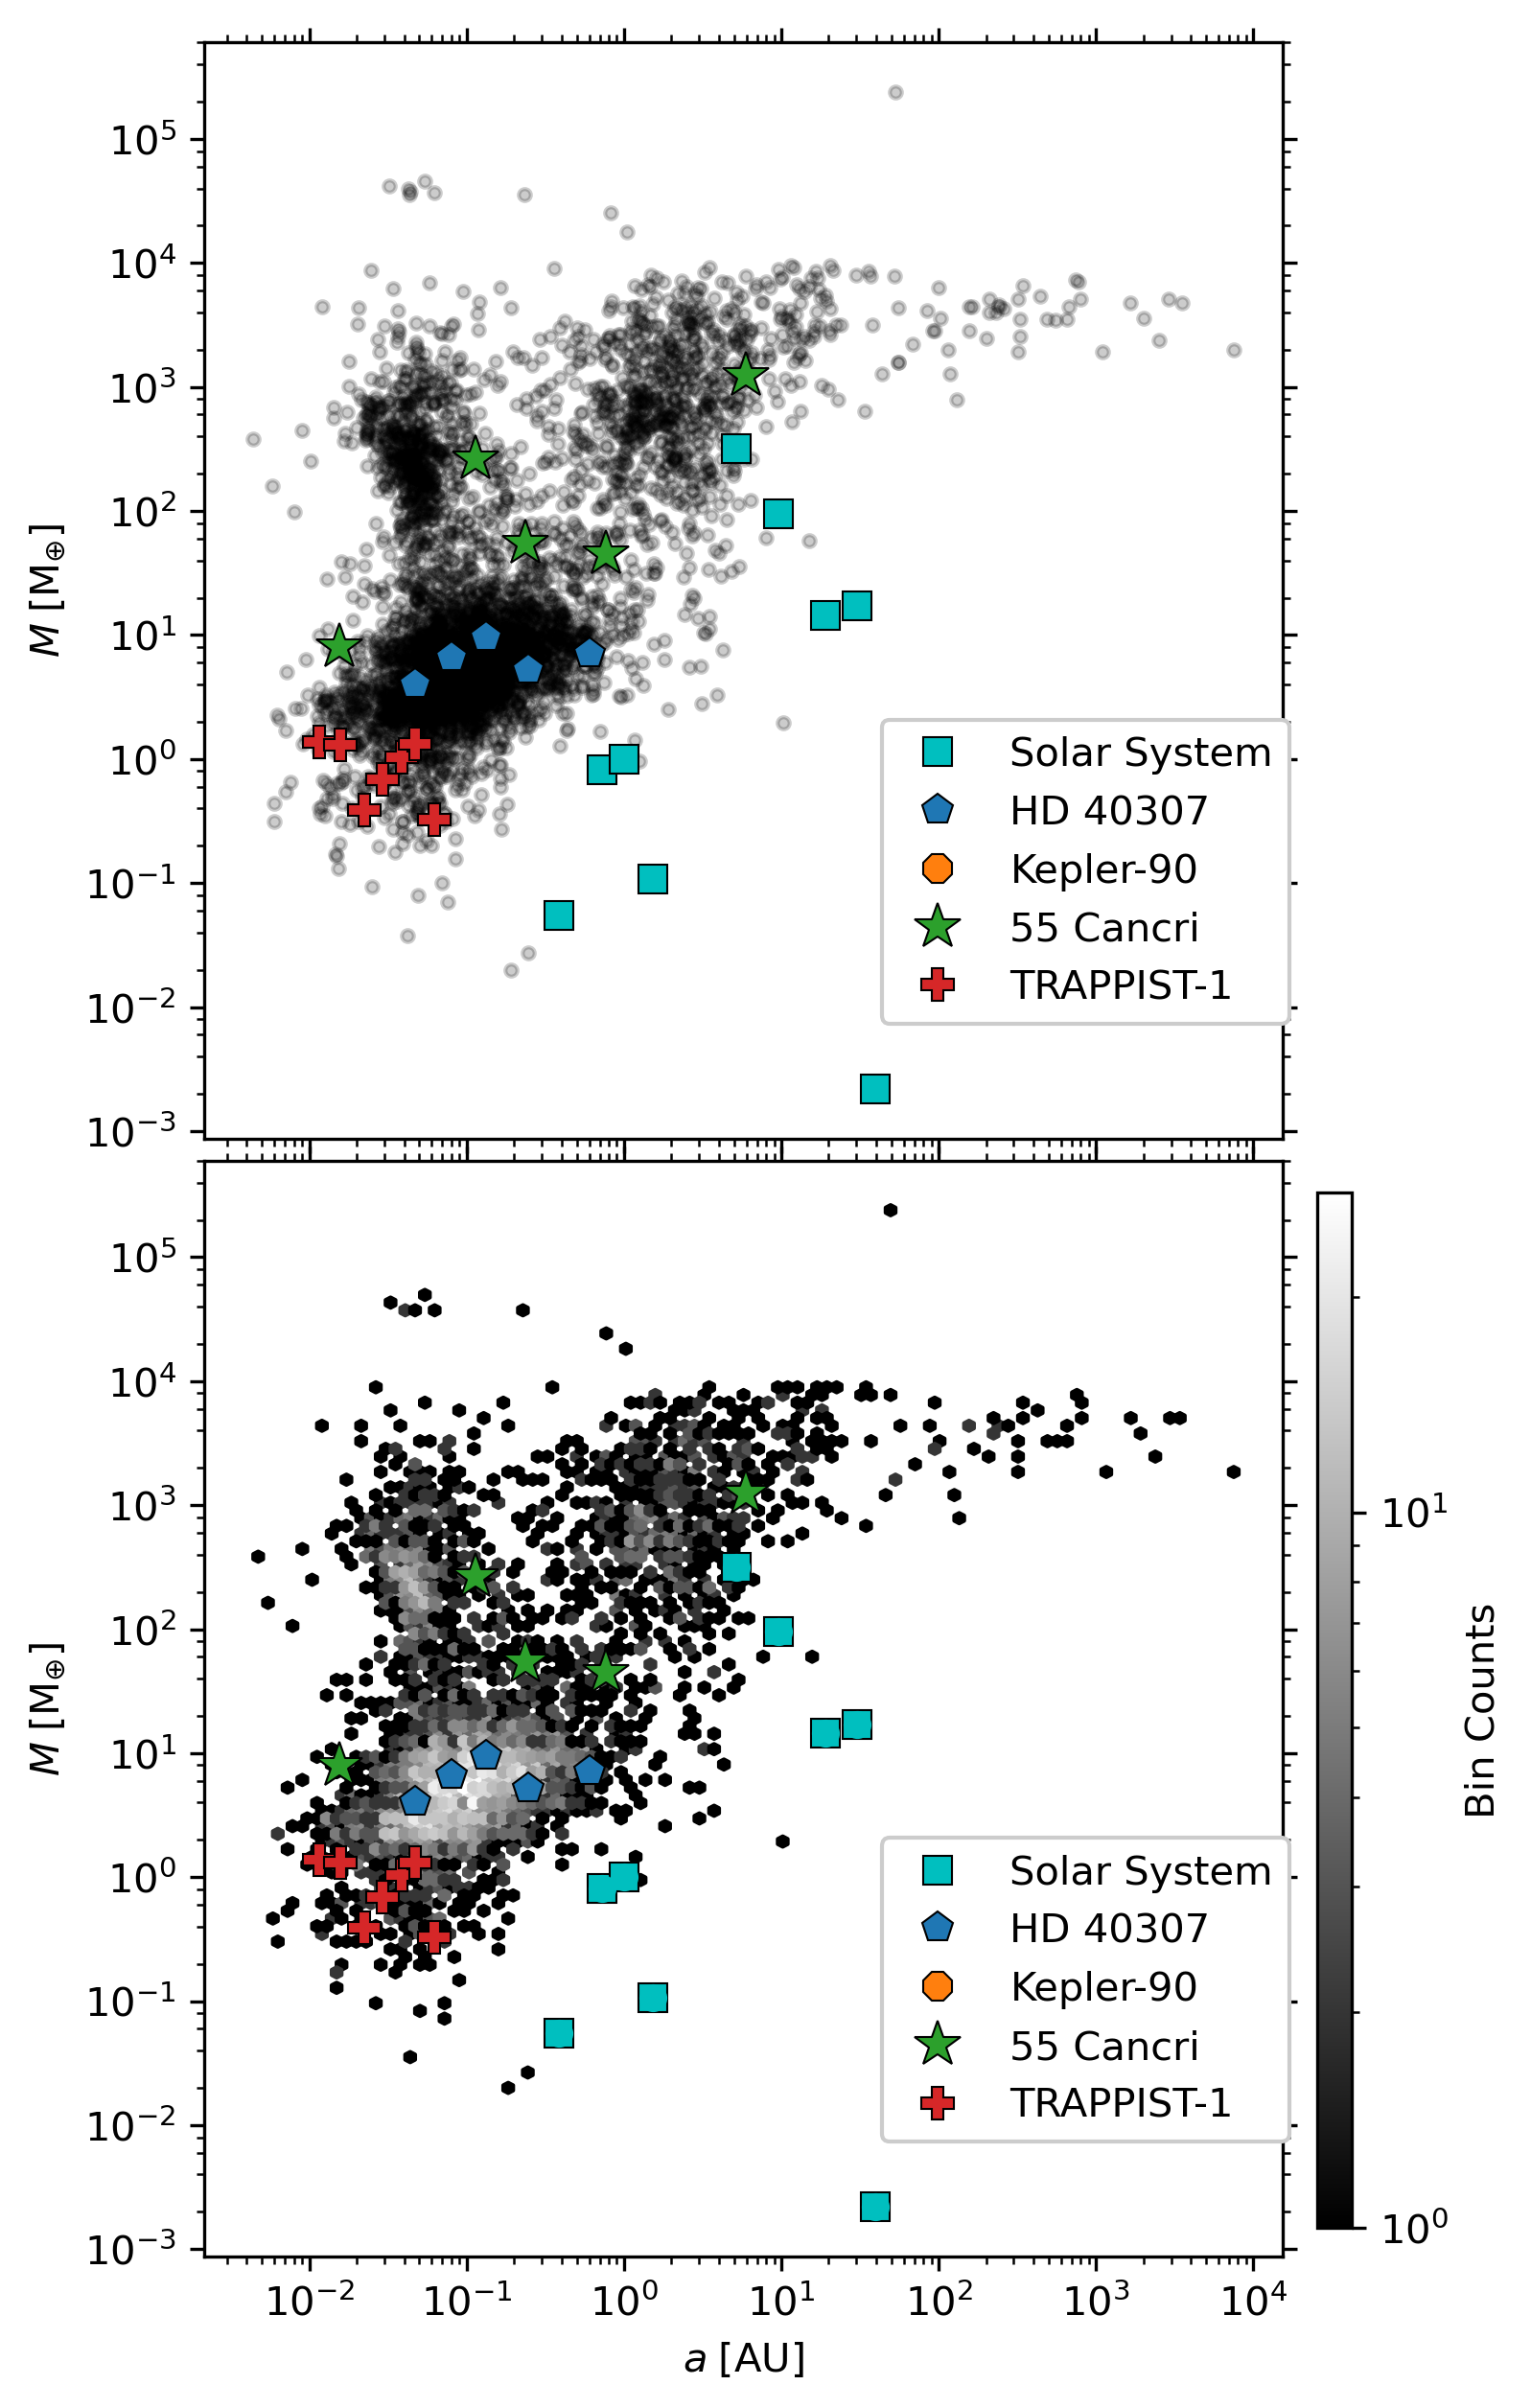

In [15]:
import matplotlib.ticker as ticks
fig,(ax0,ax1) = plt.subplots(nrows=2, dpi=300, figsize=(6,10),sharex=True)
plt.subplots_adjust(hspace=0.02, right=0.75)
ax0.scatter(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], c='k', marker='.', alpha=0.2)
ax0.scatter(solsys['orbital_radius_AU'],solsys['mass_ME'],c='c',marker='o')
ax0.set_xscale('log')
ax0.set_yscale('log')
#ax0.set_xlabel(r'$a\;[\mathrm{AU}]$')
#ax0.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')

hbin=ax1.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
           cmap = mpl.colormaps['gray'],zorder=0)
ax1.scatter(solsys['orbital_radius_AU'],solsys['mass_ME'],c='c',marker='o',zorder=20)
ax1.set_xlabel(r'$a\;[\mathrm{AU}]$')
for ax in [ax0,ax1]:
    ax.loglog(solsys['orbital_radius_AU'],solsys['mass_ME'],'cs',label='Solar System',
              mec='k',mew=0.5,ms=7)
    mks = ['p','8','*','P']
    for k,s in enumerate(['HD 40307','Kepler-90','55 Cancri','TRAPPIST-1']):
        inds = np.where(np.array(list(map(lambda s: s[:-2], exos['name']))) == s)
        ax.loglog(exos['orbital_radius_AU'][inds],exos['mass_ME'][inds],marker=mks[k],label=s,
                  ls='none',mec='k',mew=0.5,ms=12 if mks[k]=='*' else 8)
    ax.yaxis.set_major_locator(ticks.LogLocator(base=10,numticks=15))
    ax.yaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=99))
    ax.yaxis.set_minor_formatter(ticks.NullFormatter())
    ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
    ax.legend(bbox_to_anchor=(0.61,0.4),framealpha=1)
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)
cbar_ax = fig.add_axes([0.77, 0.12, 0.02, 0.36])
cb=fig.colorbar(hbin,cax=cbar_ax)
cb.set_label('Bin Counts')

Is that one large group at the lowest masses really just 1 population? How does the detection method affect what we see? These are questions you can visualize the answers to, but with 5250 data points, scatter plots with different colors and markers for each category aren't quite up to the task.

5. Code is provided that computes KDEs in mass for the 4 types of planets that are not "unknown". Plot the KDEs as line contours on a grid of mass vs orbital radius. Experiment with the colors, fills, and levels to make the visual more readable.

    Take note of the fact that scipy.stats.gaussian_kde() currently does not support logspaced grids. The best way I've found to get around this is to convert the x and y values to their logs and then override the tick labels with `ax.set_[x|y]ticks(ax.get_xticks(), labels = '$10^{{{}}}$'.format(ax.get_xticks()))`. The main drawback is that there's no clear way to recover the minor ticks.
    
    This is probably the hardest prompt in the exercise set. It's all downhill after that!

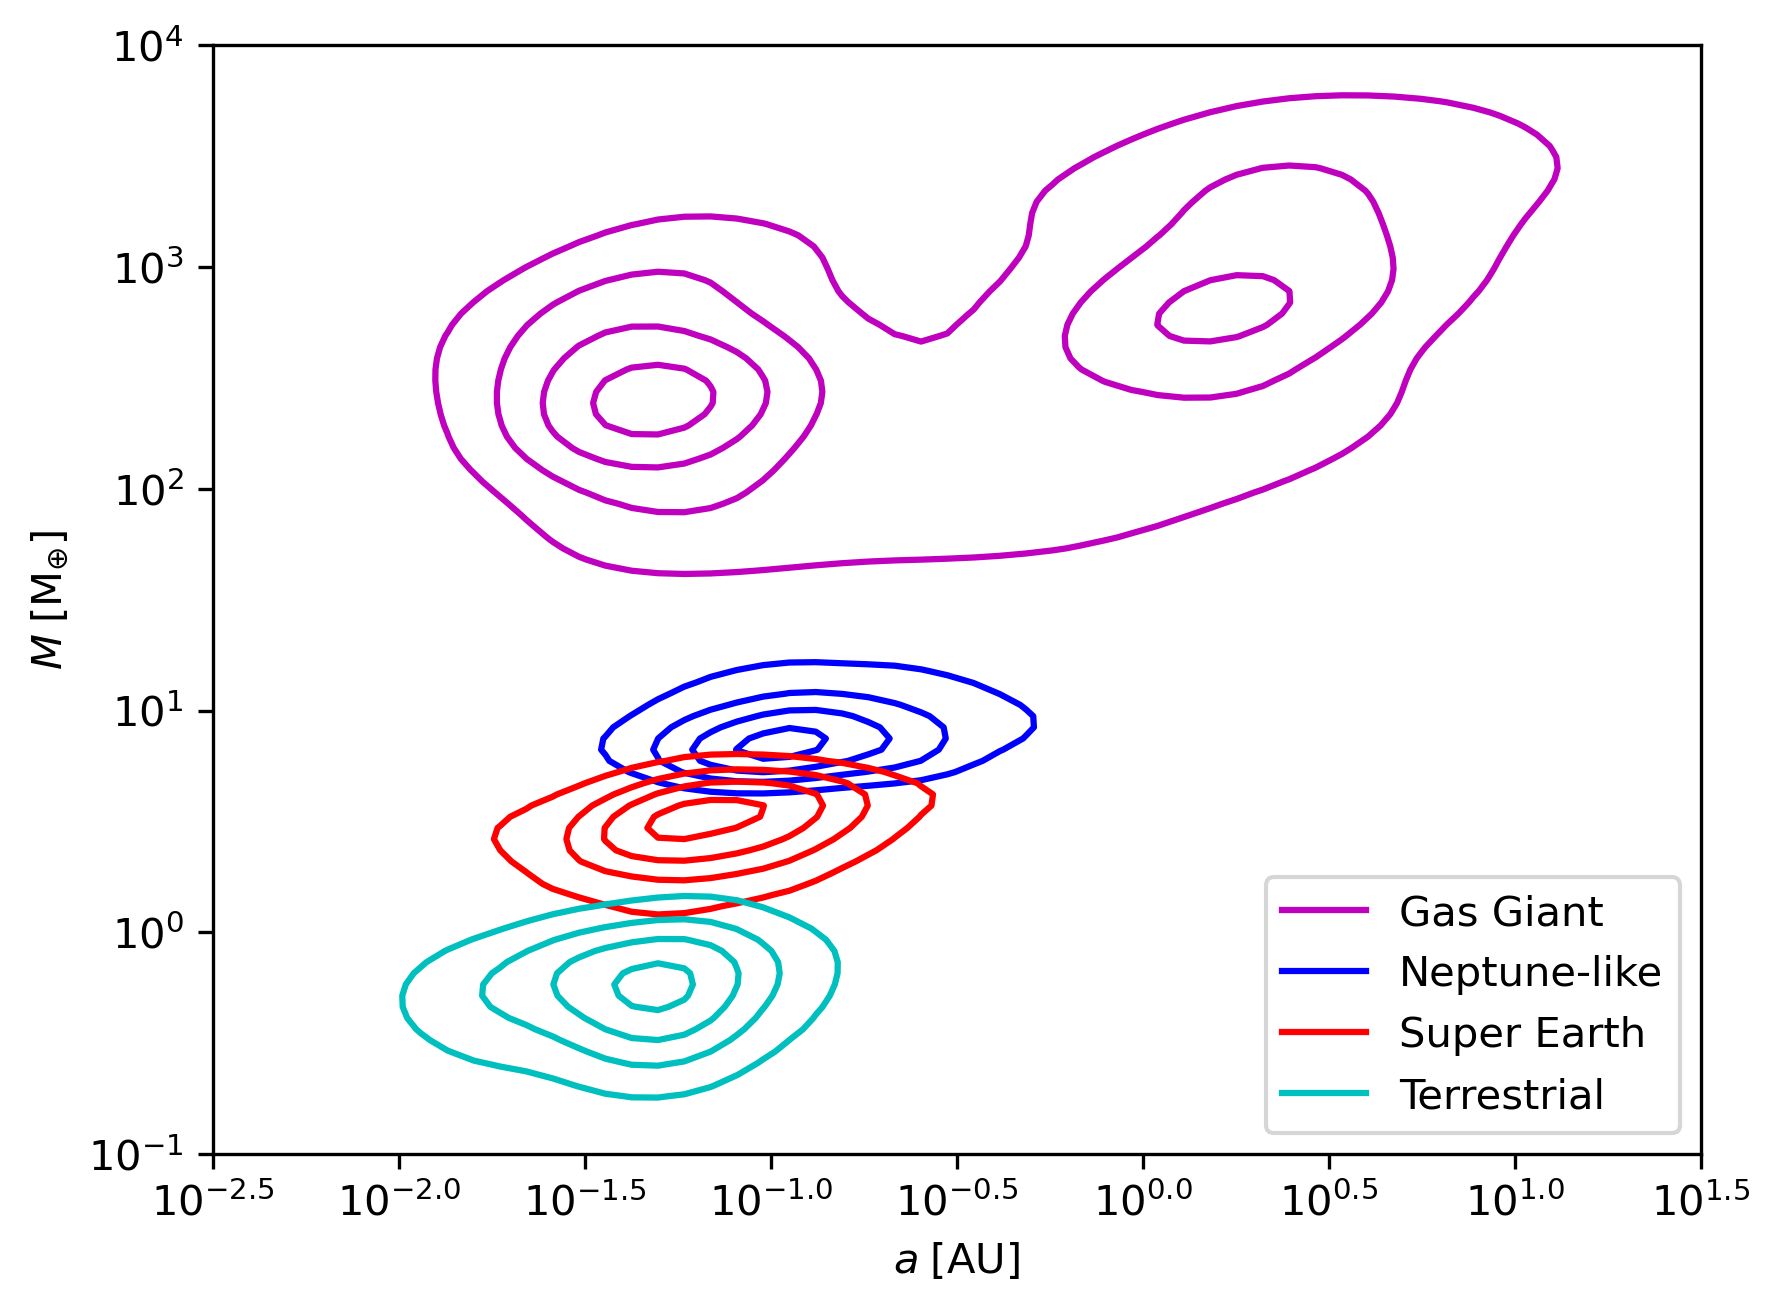

In [86]:
from itertools import cycle
from scipy.stats import gaussian_kde

fig,ax = plt.subplots(dpi=300)
X, Y = np.meshgrid(np.linspace(-3,4,100),np.linspace(-2,4,120))
pos = np.vstack([X.ravel(), Y.ravel()])

cc = cycle(['m', 'b', 'r', 'c'])
labels = sorted(set(exos['planet_type']))
lines = []

for k in labels:
    if not 'Unknown' in k:
        clr = next(cc)
        mask = np.isfinite(exos['mass_ME']) & np.isfinite(exos['orbital_radius_AU'])
        inds = np.where(np.logical_and(mask, exos['planet_type']==k))
        kernel = gaussian_kde((np.log10(exos['orbital_radius_AU'][inds]),
                               np.log10(exos['mass_ME'][inds])))
        Z = np.reshape(kernel(pos).T, X.shape)
        pcp = ax.contour(X,Y,Z, levels=4, colors=clr)
        lines.append( mpl.lines.Line2D([], [], color=clr, label=k) )
ax.set_xlim(left=-2.5,right=1.5)
ax.set_ylim(bottom=-1)
ax.set_xticks(ax.get_xticks(),
              labels=['$10^{{{:.1f}}}$'.format(lbl) for lbl in ax.get_xticks()])
ax.set_yticks(ax.get_yticks(),
              labels=['$10^{{{:.0f}}}$'.format(lbl) for lbl in ax.get_yticks()])
ax.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
ax.legend(handles=lines, loc=4)

It should look like the Terrestrial, Super-Earth, and Neptune-like contours are a closely-spaced line of ovals increasing in mass and orbital radius, while the Gas Giants are significantly higher in mass overall and have a bifurcating distribution in orbital radius.

Now let's figure out how to show on a plot that exoplanet detection methods are sensitive to different ranges of mass and orbital radius/period. For these it may be insightful to use `orbital_period_yr` for the x-axes instead of `orbital_radius_au`, particularly if you know that for timing methods, an exoplanet has to be observed for at least 3 orbits to be confirmed. Otherwise, if you're comfortable with orbital radius and period being used somewhat interchangeably per Kepler's 3rd law, you can leave the radius axis in place.

This is what the plot would look like if we tried to color- and marker-code the first scatter plot by detection method, after merging all timing-related methods:
![scatterdemo](Scatter_ExopDetectMethod.png)

Enlightening, but very cluttered. Even after merging all the timing-adjacent methods (and omitting Disk Kinematics, since that only works for planets that have not finished forming) there are still too many categories for contours to improve much on this format.

In this case, it's probably best to treat the mass and radius dependencies separately.

6. For each of the prompts below, you should merge all methods containing `Timing` into one such that any exoplanet whose detection method attribute has `Timing` in the name counts toward that category. Also, omit Disk Kinematics since the one exoplanet discovered that way hasn't fully formed.

    1. One way to break things down is to realize that `planet_type` is a proxy for mass, and use stacked horizontal bars to show the percentages of each type of exoplanet were detected with different methods. Use [this Matplotlib horizontal bar chart demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py) as a guide.
    2. Try plotting a pair of subplots, one with histograms (or KDEs, if you're comfortable with those) of each detection method binned in `mass_ME`, and the other featuring the same data binned in `orbital_period`. Refer to the part of the tutorial on scattered data for binning recommendations. Compare the results with and without normalization.

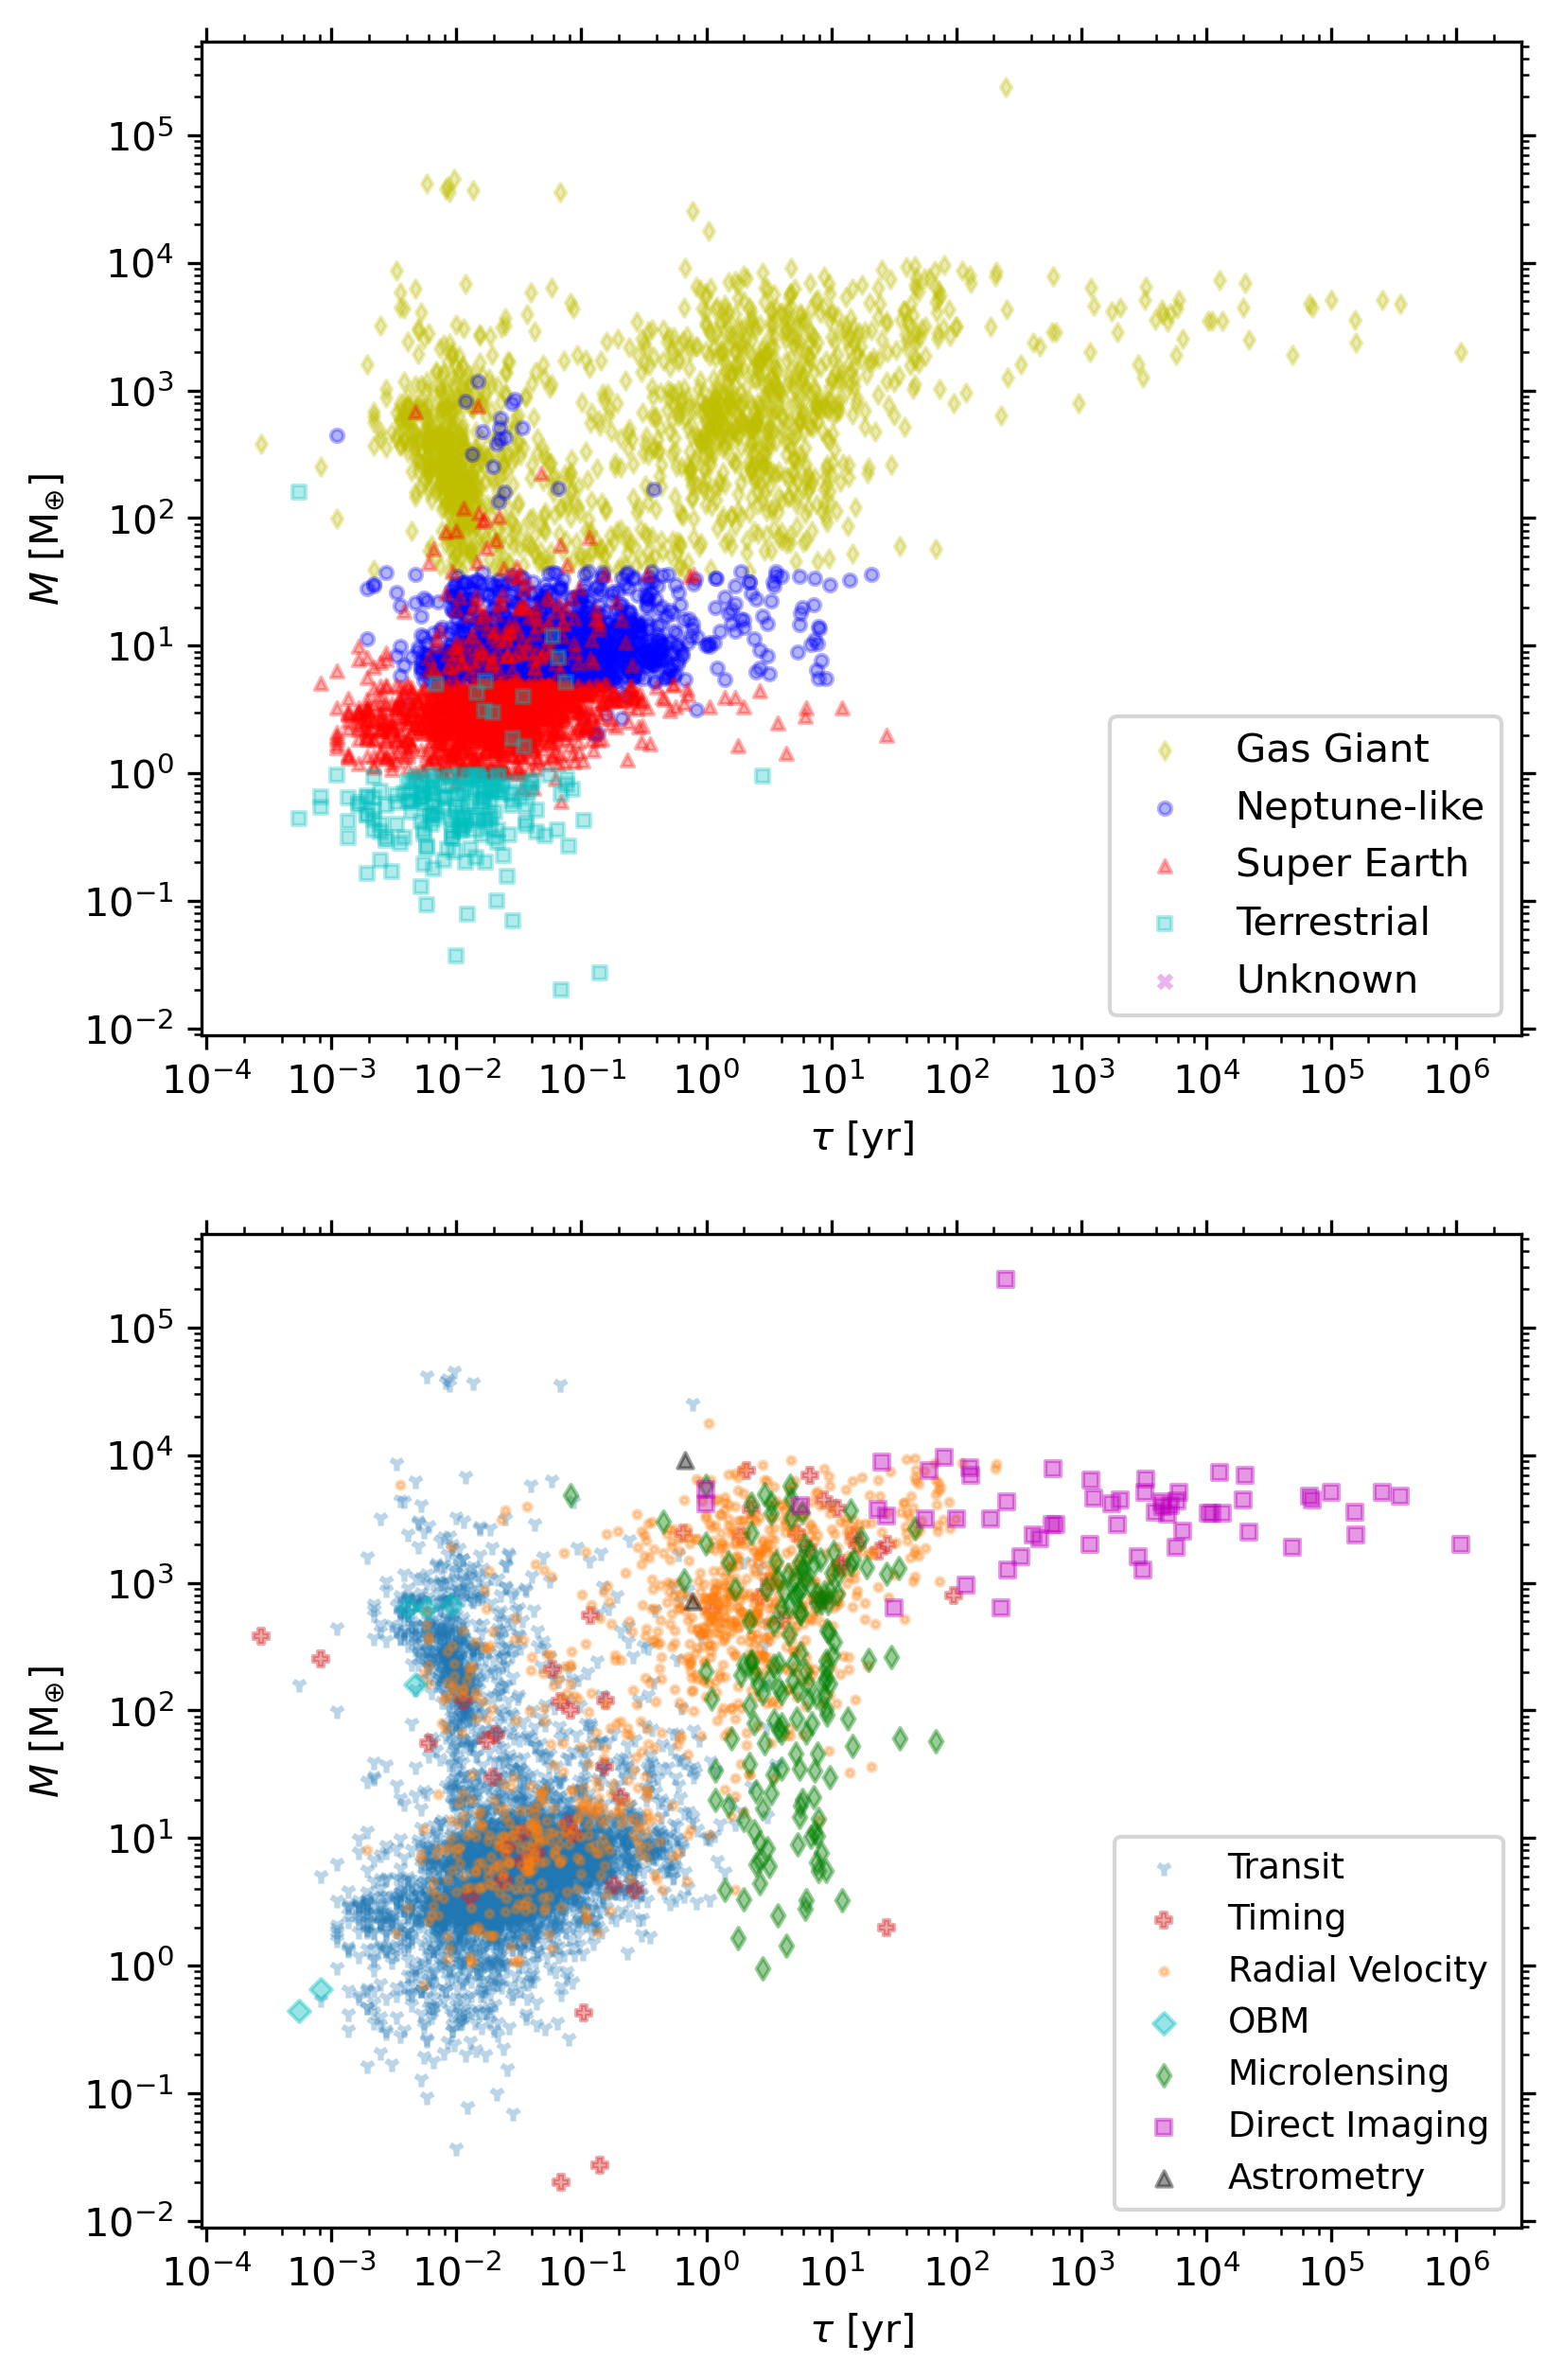

In [16]:
from itertools import cycle

fig,(ax0,ax1) = plt.subplots(nrows=2, dpi=300, figsize=(6,10))
#plt.subplots_adjust(hspace=0.02)

colcy, mkrcy = cycle(['y','b','r','c','m']), cycle(['d', 'o','^','s','x'])
#ptype_dict = dict(zip( sorted(set(exos['planet_type']).remove('Gas Giant').remove('Unknown')), ['^', 's', 'o'] ))
for k in sorted(set(exos['planet_type'])):
    #if 'Gas Giant' not in k and 'Unknown' not in k:
    inds = np.where(np.logical_and(~np.isnan(exos['mass_ME']),exos['planet_type']==k))
    ax0.scatter(exos['orbital_period_yr'][inds], exos['mass_ME'][inds],
                c=next(colcy),marker=next(mkrcy), alpha=0.3, label=k, s=10)
ax0.legend()

methds = ['Timing']
dummy,counts = np.unique(exos['detection_method'],return_counts=True)
for m in set(exos['detection_method']):
       if not 'Timing' in m and not 'Kinematics' in m:
            methds.append(m)
#it just so happens that the detection methods sort alphabetically are *almost* in decreasing order
# of use, so I'm going to start with a cheat and see if it works
clcy2 = cycle(['tab:blue', 'tab:red','tab:orange', 'c','g', 'm', 'k'])
mkcy2 = cycle(['1','P','.','D','d','s', '^'])
for k in sorted(methds)[::-1]:
    if k == 'Timing':
        kT = ['Transit Timing Variations','Pulsar Timing',
              'Pulsation Timing Variations','Eclipse Timing Variations']
        inds = np.where(np.logical_and(~np.isnan(exos['mass_ME']),
                                       np.char.find(exos['detection_method'],k)+1))
    else:
        inds = np.where(np.logical_and(~np.isnan(exos['mass_ME']),
                                       exos['detection_method']==k))
    
    ax1.scatter(exos['orbital_period_yr'][inds],exos['mass_ME'][inds],
                c=next(clcy2), marker=next(mkcy2), 
                alpha=0.3 if k in ['Transit','Radial Velocity'] else 0.4,
                label=k.replace('Orbital Brightness Modulation',
                                'OBM').replace('Gravitational ',''), s=15)

for ax in (ax0,ax1):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$\tau$ [yr]')
    ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
    ax.tick_params(axis='both', which='both', bottom=True,
                   top=True, left=True, right=True)
    ax.xaxis.set_major_locator(ticks.LogLocator(base=10,numticks=15))
    ax.xaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=99))
    ax.xaxis.set_minor_formatter(ticks.NullFormatter())
ax1.legend(fontsize=9)